In [1]:
import pickle
import dataset_no_model as dataset
import vsm
import sst

In [2]:
BERT_TWITTER_MODEL_FNAME = 'models/BERT_twitter_model.sav'
BERT_TWITTER_AIRLINE_MODEL_FNAME = 'models/BERT_twitter_airline.sav'
BERT_TWITTER_APPLE_MODEL_FNAME = 'models/BERT_twitter_apple.sav'
BERT_TWITTER_COMBINED_FNAME = 'models/BERT_twitter_model_combined.sav'

BERTWEET_TWITTER_MODEL_FNAME = 'models/BERTweet_twitter_model.sav'
BERTWEET_TWITTER_AIRLINE_MODEL_FNAME = 'models/BERTweet_twitter_airline.sav'
BERTWEET_TWITTER_APPLE_MODEL_FNAME = 'models/BERTweet_twitter_apple.sav'
BERTWEET_TWITTER_COMBINED_FNAME = 'models/BERTweet_twitter_model_combined.sav'

In [ ]:
bert_twitter_exp = pickle.load(open(BERT_TWITTER_MODEL_FNAME, 'rb'))
bert_airline_exp = pickle.load(open(BERT_TWITTER_AIRLINE_MODEL_FNAME, 'rb'))
bert_apple_exp = pickle.load(open(BERT_TWITTER_APPLE_MODEL_FNAME, 'rb'))
bert_combined_exp = pickle.load(open(BERT_TWITTER_COMBINED_FNAME, 'rb'))

bertweet_twitter_exp = pickle.load(open(BERTWEET_TWITTER_MODEL_FNAME, 'rb'))
bertweet_airline_exp = pickle.load(open(BERTWEET_TWITTER_AIRLINE_MODEL_FNAME, 'rb'))
bertweet_apple_exp = pickle.load(open(BERTWEET_TWITTER_APPLE_MODEL_FNAME, 'rb'))
bertweet_combined_exp = pickle.load(open(BERTWEET_TWITTER_COMBINED_FNAME, 'rb'))

In [ ]:
BERT_TEST_FNAME = 'results/BERT_test_combined.sav'
BERTWEET_TEST_FNAME = 'results/BERTweet_test_combined.sav'
BERT_TEST_NEUTRAL_FNAME = 'results/BERT_test_combined_neutral.sav'

In [ ]:
bert_test = pickle.load(open(BERT_TEST_FNAME, 'rb'))
bertweet_test = pickle.load(open(BERTWEET_TEST_FNAME, 'rb'))

In [ ]:
bert_test['scores']

In [ ]:
bertweet_test['scores']

In [ ]:
bert_test_neutral = pickle.load(open(BERT_TEST_NEUTRAL_FNAME, 'rb'))

In [ ]:
bert_test_neutral['scores']

In [ ]:
from IPython.display import Markdown as md

## Sentiment Data As-Is

|Model|Dataset|macro f1|weighted f1|
|-----|-------|--------|-----------|
|BERT|Twitter Sentiment Analysis|0.528|0.551|
|BERT|Twitter Airline Sentiment|0.758|0.816|
|BERT|Twitter Apple Sentiment|0.469|0.703|
|BERT|Combined|0.530|0.561|
|BERTweet|Twitter Sentiment Analysis|0.553|0.574|
|BERTweet|Twitter Airline Sentiment|0.753|0.809|
|BERTweet|Twitter Apple Sentiment|0.446|0.705|
|BERTweet|Combined|0.550|0.581|

## Sentiment Data with Irrelevant Relabeled as Neutral

|Model|Dataset|macro f1|weighted f1|
|-----|-------|--------|-----------|
|BERT|Twitter Sentiment Analysis|0|0|
|BERT|Twitter Airline Sentiment|0.758|0.816|
|BERT|Twitter Apple Sentiment|0.668|0.758|
|BERT|Combined|0.628|0.631|
|BERTweet|Twitter Sentiment Analysis|0|0|
|BERTweet|Twitter Airline Sentiment|0.753|0.809|
|BERTweet|Twitter Apple Sentiment|0.622|0.730|
|BERTweet|Combined|0|0|

## Look at Twitter Irrelevant

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bert_twitter_test = pd.read_csv('results/BERT_predictions_added_to_twitter_test.csv')

In [11]:
irr = bert_twitter_test[bert_twitter_test['sentiment'] == 'Irrelevant']
irr

,Unnamed: 0,text,sentiment,entity,BERT_sentiment
37,102,Appreciate the (sonic) concepts / praxis Valen...,Irrelevant,2418,Neutral
38,104,Evaluate the (sound) concepts / concepts of Va...,Irrelevant,2418,Positive
39,107,Appreciate the (sonic) conversations / actions...,Irrelevant,2418,Neutral
43,128,Love these new @ GhostLive cans!! Does anyone ...,Irrelevant,2422,Neutral
44,129,Loving these new @GhostLifestyle cans!! Anyone...,Irrelevant,2422,Irrelevant
...,...,...,...,...,...
22187,73962,I know this asset they are referring to (it's ...,Irrelevant,9071,Negative
22188,73963,I know this asset they're referring to (it's n...,Irrelevant,9071,Negative
22197,73993,"Oh, yes, I used to work with these guys. Secon...",Irrelevant,9077,Positive
22198,73997,"Oh, yeah, I used to work under these guys. Tot...",Irrelevant,9077,Positive


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


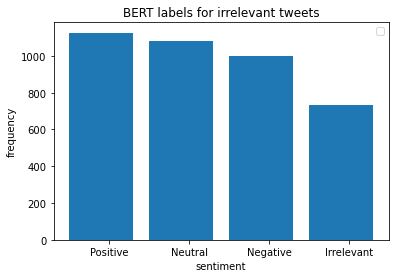

In [24]:
# Unique values of sentiment
twitter_sentiment_labels = ["Positive","Neutral","Negative","Irrelevant"]

irr_cts = irr['BERT_sentiment'].value_counts()

X_axis = np.arange(len(irr_cts))
  
plt.bar(X_axis - 0.1, irr_cts)
  
plt.xticks(X_axis, twitter_sentiment_labels)
plt.xlabel("sentiment")
plt.ylabel("frequency")
plt.title("BERT labels for irrelevant tweets")
plt.legend()
plt.show()

## Look at Twitter not_relevant

In [25]:
bert_apple_test = pd.read_csv('results/BERT_predictions_added_to_twitter_test_apple.csv')

In [27]:
nr = bert_apple_test[bert_apple_test['sentiment'] == 'not_relevant']
nr

,Unnamed: 0,tweet_id,text,sentiment,BERT_sentiment
14,129,623495642,#GoPro: What Competition? Part 2 #GPRO #AAPL ...,not_relevant,3
195,1814,623497338,@kibs33 Dizzy-doings on Wall Street tomorrow? ...,not_relevant,3
236,2183,623497713,@Apple honey crisp apple for the win,not_relevant,3
270,2572,623498102,"#AAPL:After Decades Of Consolidation, Wall Str...",not_relevant,3
272,2586,623498116,#Ebay #Music @@Apple TV2 Gen Jailbroken Unteth...,not_relevant,3
